# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("data/weedprices01012015.csv")
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [2]:
import numpy as np

In [3]:
df.loc[df['LowQ'] == 'I feel bad for these guys -->', 'LowQ'] = np.nan

In [4]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

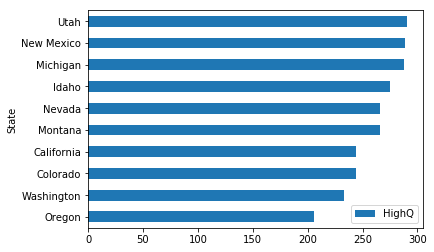

In [5]:
df.sort_values(by='HighQ', ascending=True).head(10).plot(kind='barh',x='State', y='HighQ')

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [6]:
top_five = df.sort_values(by='HighQ').head(5)
top_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32


In [7]:
bottom_five = df.sort_values(by='HighQ').tail(5)
bottom_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
15,Iowa,364.92,975,289.05,1045,NaN,122
46,Virginia,364.95,3514,293.02,3085,NaN,285
32,Maryland,366.01,2863,255.84,2463,NaN,193
45,Vermont,371.23,357,308.86,367,NaN,32
28,North Dakota,393.94,213,339.60,327,NaN,23


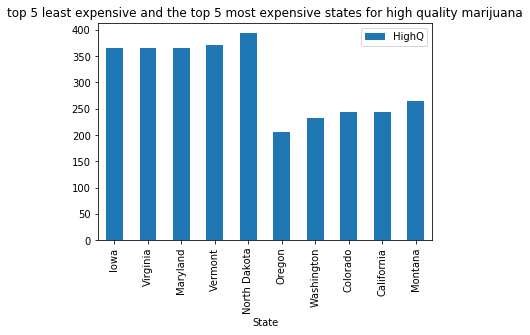

In [8]:
ax = pd.concat([bottom_five, top_five], ignore_index=True).plot(kind='bar',x='State', y='HighQ')
ax.set_title('top 5 least expensive and the top 5 most expensive states for high quality marijuana')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [10]:
import glob

In [11]:
filenames = glob.glob('data/*.csv')
filenames

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [12]:
price_dfs = [pd.read_csv(file) for file in filenames]
price_dfs

[                   State    HighQ  HighQN     MedQ  MedQN     LowQ  LowQN
 0                Alabama  $339.06    1042  $198.64    933  $149.49    123
 1                 Alaska  $288.75     252   $260.6    297  $388.58     26
 2                Arizona  $303.31    1941  $209.35   1625  $189.45    222
 3               Arkansas  $361.85     576  $185.62    544  $125.87    112
 4             California  $248.78   12096  $193.56  12812  $192.92    778
 5               Colorado  $236.31    2161  $195.29   1728   $213.5    128
 6            Connecticut   $347.9    1294  $273.97   1316  $257.36     91
 7               Delaware  $373.18     347  $226.25    273  $199.88     34
 8   District of Columbia  $352.26     433  $295.67    349  $213.72     39
 9                Florida  $306.43    6506  $220.03   5237  $158.26    514
 10               Georgia  $332.21    3099  $213.52   2269  $153.45    229
 11                Hawaii  $310.96     328  $270.38    350  $160.46     25
 12                 Idaho

In [13]:
len(price_dfs)

491

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [14]:
for filename, dataframe in zip(filenames,price_dfs):
    print('Looking at', filename)
    dataframe['filename'] = filename

Looking at data/weedprices01012014.csv
Looking at data/weedprices01012015.csv
Looking at data/weedprices01022014.csv
Looking at data/weedprices01022015.csv
Looking at data/weedprices01032014.csv
Looking at data/weedprices01042014.csv
Looking at data/weedprices01052014.csv
Looking at data/weedprices01062014.csv
Looking at data/weedprices01062015.csv
Looking at data/weedprices01072014.csv
Looking at data/weedprices01072015.csv
Looking at data/weedprices01082014.csv
Looking at data/weedprices01092014.csv
Looking at data/weedprices01102014.csv
Looking at data/weedprices01112014.csv
Looking at data/weedprices01122014.csv
Looking at data/weedprices02012014.csv
Looking at data/weedprices02012015.csv
Looking at data/weedprices02022014.csv
Looking at data/weedprices02022015.csv
Looking at data/weedprices02032014.csv
Looking at data/weedprices02042014.csv
Looking at data/weedprices02052014.csv
Looking at data/weedprices02062014.csv
Looking at data/weedprices02062015.csv
Looking at data/weedprice

Looking at data/weedprices17012014.csv
Looking at data/weedprices17012015.csv
Looking at data/weedprices17022014.csv
Looking at data/weedprices17032014.csv
Looking at data/weedprices17042014.csv
Looking at data/weedprices17052014.csv
Looking at data/weedprices17052015.csv
Looking at data/weedprices17062014.csv
Looking at data/weedprices17062015.csv
Looking at data/weedprices17072014.csv
Looking at data/weedprices17072015.csv
Looking at data/weedprices17082014.csv
Looking at data/weedprices17092014.csv
Looking at data/weedprices17102014.csv
Looking at data/weedprices17112014.csv
Looking at data/weedprices17122014.csv
Looking at data/weedprices18012014.csv
Looking at data/weedprices18012015.csv
Looking at data/weedprices18022014.csv
Looking at data/weedprices18032014.csv
Looking at data/weedprices18042014.csv
Looking at data/weedprices18052014.csv
Looking at data/weedprices18052015.csv
Looking at data/weedprices18062014.csv
Looking at data/weedprices18062015.csv
Looking at data/weedprice

In [15]:
price_dfs[-2]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.42,1040,$198.68,932,$149.49,123,data/weedprices31122013.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices31122013.csv
2,Arizona,$303.33,1939,$209.35,1624,$189.45,222,data/weedprices31122013.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices31122013.csv
4,California,$248.76,12082,$193.54,12792,$193.8,773,data/weedprices31122013.csv
5,Colorado,$236.33,2152,$195.51,1710,$215.04,127,data/weedprices31122013.csv
6,Connecticut,$348.04,1292,$274.75,1309,$257.36,91,data/weedprices31122013.csv
7,Delaware,$374.31,345,$226.25,273,$199.88,34,data/weedprices31122013.csv
8,District of Columbia,$352.26,433,$295.82,347,$213.72,39,data/weedprices31122013.csv
9,Florida,$306.43,6497,$220.01,5234,$158.26,514,data/weedprices31122013.csv


## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [16]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv


In [17]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182,data/weedprices31122014.csv
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37,data/weedprices31122014.csv


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [18]:
df_new = pd.concat(price_dfs, ignore_index=True)

In [19]:
df_new.shape

(24990, 8)

In [20]:
df_new

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv


## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [21]:
# df_new['date'] = df_new['filename'].str.extract('.*(\d\d)\d\d\d\d\d\d', expand = False)

In [22]:
# df_new['month'] = df_new['filename'].str.extract('.*\d\d(\d\d)\d\d\d\d', expand = False)

In [23]:
# df_new['year'] = df_new['filename'].str.extract('.*\d\d\d\d(\d\d\d\d)', expand = False)

In [24]:
# df_new

## Okay, now add all three columns back at once

You should rename the columns first!

In [25]:
extracted = df_new['filename'].str.extract('.*(\d\d)(\d\d)(\d\d\d\d)', expand = True)

In [26]:
extracted.columns = ['date','month','year']

In [27]:
a = pd.concat([df_new, extracted], axis = 1)
a

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,date,month,year
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv,01,01,2014
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv,01,01,2014
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv,01,01,2014
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv,01,01,2014
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv,01,01,2014


## Plot the change in marijuana prices in Oregon over time

In [28]:
b = a[a['State'] == 'Oregon']
b

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,date,month,year
31,Oregon,$213.49,1612,$188.55,1336,$175.87,61,data/weedprices01012014.csv,01,01,2014
82,Oregon,205.8,2179,180.9,2018,I feel bad for these guys -->,95,data/weedprices01012015.csv,01,01,2015
133,Oregon,$212.44,1677,$188.96,1384,$174.52,65,data/weedprices01022014.csv,01,02,2014
184,Oregon,205.32,2232,180.47,2091,I feel bad for these guys -->,99,data/weedprices01022015.csv,01,02,2015
235,Oregon,$212.01,1731,$188.5,1450,$169.34,68,data/weedprices01032014.csv,01,03,2014
286,Oregon,$210.81,1783,$186.31,1507,$165.54,72,data/weedprices01042014.csv,01,04,2014
337,Oregon,$210.12,1816,$185.73,1551,$165.81,76,data/weedprices01052014.csv,01,05,2014
388,Oregon,$209.54,1858,$185.17,1606,$163.84,77,data/weedprices01062014.csv,01,06,2014
439,Oregon,202.13,2531,178.16,2402,I feel bad for these guys -->,113,data/weedprices01062015.csv,01,06,2015
490,Oregon,$208.85,1900,$184.86,1641,$175.53,80,data/weedprices01072014.csv,01,07,2014


In [29]:
b['HighQ'] = b['HighQ'].astype(str).str.extract('^[$]?(.+)$')
b

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,date,month,year
31,Oregon,213.49,1612,$188.55,1336,$175.87,61,data/weedprices01012014.csv,01,01,2014
82,Oregon,205.8,2179,180.9,2018,I feel bad for these guys -->,95,data/weedprices01012015.csv,01,01,2015
133,Oregon,212.44,1677,$188.96,1384,$174.52,65,data/weedprices01022014.csv,01,02,2014
184,Oregon,205.32,2232,180.47,2091,I feel bad for these guys -->,99,data/weedprices01022015.csv,01,02,2015
235,Oregon,212.01,1731,$188.5,1450,$169.34,68,data/weedprices01032014.csv,01,03,2014
286,Oregon,210.81,1783,$186.31,1507,$165.54,72,data/weedprices01042014.csv,01,04,2014
337,Oregon,210.12,1816,$185.73,1551,$165.81,76,data/weedprices01052014.csv,01,05,2014
388,Oregon,209.54,1858,$185.17,1606,$163.84,77,data/weedprices01062014.csv,01,06,2014
439,Oregon,202.13,2531,178.16,2402,I feel bad for these guys -->,113,data/weedprices01062015.csv,01,06,2015
490,Oregon,208.85,1900,$184.86,1641,$175.53,80,data/weedprices01072014.csv,01,07,2014


In [30]:
#b.sort_values(by='date')

In [31]:
#b.sort_values(by='month', ascending=True)

In [32]:
#b.sort_values(by='year')

In [33]:
b['HighQ'] = b['HighQ'].astype(float)
b

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,date,month,year
31,Oregon,213.49,1612,$188.55,1336,$175.87,61,data/weedprices01012014.csv,01,01,2014
82,Oregon,205.80,2179,180.9,2018,I feel bad for these guys -->,95,data/weedprices01012015.csv,01,01,2015
133,Oregon,212.44,1677,$188.96,1384,$174.52,65,data/weedprices01022014.csv,01,02,2014
184,Oregon,205.32,2232,180.47,2091,I feel bad for these guys -->,99,data/weedprices01022015.csv,01,02,2015
235,Oregon,212.01,1731,$188.5,1450,$169.34,68,data/weedprices01032014.csv,01,03,2014
286,Oregon,210.81,1783,$186.31,1507,$165.54,72,data/weedprices01042014.csv,01,04,2014
337,Oregon,210.12,1816,$185.73,1551,$165.81,76,data/weedprices01052014.csv,01,05,2014
388,Oregon,209.54,1858,$185.17,1606,$163.84,77,data/weedprices01062014.csv,01,06,2014
439,Oregon,202.13,2531,178.16,2402,I feel bad for these guys -->,113,data/weedprices01062015.csv,01,06,2015
490,Oregon,208.85,1900,$184.86,1641,$175.53,80,data/weedprices01072014.csv,01,07,2014


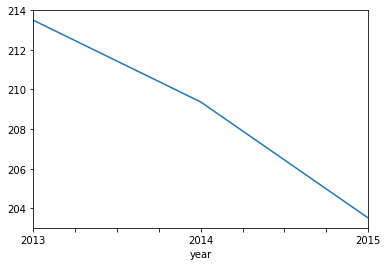

In [34]:
b.groupby('year')['HighQ'].mean().plot()

## Plot the change in marijuana prices in all states over time

In [35]:
df['State']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                 Montana
21                Nebraska
22                  Nevada
23           New Hampshire
24              New Jersey
25              New Mexico
26                New York
27          North Carolina
28            North Dakota
29                    Ohio
30                Oklahoma
31                  Oregon
32                Maryland
33           Massachusetts
34                Michigan
35               Minnesota
36             Mississippi
3

In [36]:
a['HighQ'] = a['HighQ'].astype(str).str.extract('^[$]?(.+)$')
a

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,date,month,year
0,Alabama,339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014
5,Colorado,236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv,01,01,2014
6,Connecticut,347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv,01,01,2014
7,Delaware,373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv,01,01,2014
8,District of Columbia,352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv,01,01,2014
9,Florida,306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv,01,01,2014


In [37]:
x = df['State']
x

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                 Montana
21                Nebraska
22                  Nevada
23           New Hampshire
24              New Jersey
25              New Mexico
26                New York
27          North Carolina
28            North Dakota
29                    Ohio
30                Oklahoma
31                  Oregon
32                Maryland
33           Massachusetts
34                Michigan
35               Minnesota
36             Mississippi
3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


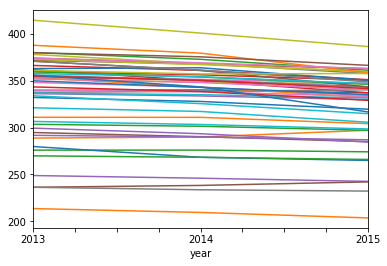

In [46]:
for state in x:
    z = a[a['State'] == state]
    z['HighQ'] = z['HighQ'].astype(float)
    z.groupby('year')['HighQ'].mean().plot()